## Projecto: Condiciones financieras en base microdatos (EFX F3)
#### Objetivo:		Limpieza inicial base
#### Fecha modificación: 14/11/2022	
#### Autor:			Jacinta Diestre
#### Contacto:		jacinta.diestre@gmail.com


#### Notas generales
* En este notebook realizamos la limpieza de la base de microdatos que utilizaremos para realiazar el análisis de condiciones financieras.
* Se abordan problemas de formato, duplicados, junto con definir la estructura de los créditos decrecientes.
* <div class="alert-info">
Las preguntas para Equifax, irán destacadas con celeste.
</div>
* <div class="alert-success">
Y el espacio de respuestas con verde
</div>

### índice Notebook
#### 1. Fija directorios
- 1.1 Global países 
- 1.2 Directorio usuario
   
#### 2. Limpieza de base
- 2.1 Base inicial (raw)
- 2.2 Revisión tipo de datos y cantidad de observaciones
- 2.3 Revisión Nulos
- 2.4 Revisión Duplicados
- 2.5 Archivo datos duplicados eliminados
- 2.6 Revisión periodos de información duplicados en un ID
- 2.7 Archivo periodos de información duplicados en un ID
   
#### 3. Base crédito Decreciente de personas juridicas
- 3.1 Selección de observaciones
- 3.2 Selección variables de interés
- 3.3 Arreglo variables de fechas %td
- 3.3 Base créditos decrecientes personas jurídicas
   
#### 4. Revisión créditos Decrecientes por identificador único
- 4.1 Plazo del crédito
     - 4.1.1 Plazos nulos o iguales a 0
     - 4.1.2 Meses entre la fecha de otorgamiento y vencimiento.
     - 4.1.3 Cuenta_meses negativos, ceros o menores a 1 mes.
     - 4.1.4 Comparación plazo y cuenta_meses
	 - 4.1.5 Variación plazo en ID_UNICO_CRED_str
     - 4.1.6 Archivo problemas con las fechas y plazo
- 4.2 Monto del crédito
     - 4.2.1 Montos nulos o iguales a 0
     - 4.2.2 Variación monto en ID_UNICO_CRED_str
	 - 4.2.3 Monto que pasa a cero
     - 4.2.4 Archivo problemas con monto
- 4.3 Cuota del crédito
     - 4.3.1 Cuotas nulas o iguales a 0
     - 4.3.2 Variación cuota en ID_UNICO_CRED_str
     - 4.3.3 Archivo problemas cuota
	 
#### 5.Revisión Fechas de otorgamiento y vencimiento 
  - 5.1 Fecha de otorgamiento y vencimiento nulas 
  - 5.2 Periodos fecha de otorgamiento
  - 5.3 Fecha de otorgamiento Antiguas

### 0. Comienza el script
- Aquí se importan los comandos que van a utilizar. 
- En caso de no tenerlos instalados hay que correr los siguientes comandos
-- pip install pandas

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
import seaborn as sns
import matplotlib.pyplot as plt 
warnings.filterwarnings("ignore")

#### 1. Fija directorios
- 1.1 Global países
-- Para asignar la global de pais eliminar el signo gato del principio.
Hay que dejar un sólo país, si queda más de uno sin comentar, entonces la global toma el último valor asignado. 


In [2]:
global pais
# pais = "AR"
# pais = "CH"
# pais = "CR"
# pais = "EC"
pais = "ES"
# pais = "HO"
# pais = "PE"
# pais = "PR"
# pais = "UR" 

- 1.2 Directorio usuario
- Asignar el directorio del usuario que está utilizando el notebook.
- Revisar directorio para One Drive: /Users/jacinta/Library/CloudStorage/OneDrive-Personal/EFX F3/

In [4]:
global dir 
dir = "/Users/jacinta/Desktop/EFX F3/"+str(pais)+"/"
global data 
data = str(dir)+"data/"

#### 2. Limpieza de base
- 2.1 Base inicial (raw)

In [6]:
dtafile = str(data)+"raw/EFX F3 010 010 muestra ES pod.dta"
base = pd.read_stata(dtafile)
base.tail()

,idpersona,idpersona_str,ID_UNICO_CRED,ID_UNICO_CRED_str,periodo_informacion,peri_info_monthly,peri_info_y,peri_info_m,referencia_unica,id_acreedor,...,codi_dest,otorgante_publico_privado,regulada,tipo_entidad,ubicacion_geogrfica,obs_repetidas,periodo_informacion_100,peri_info_daily1,peri_info_dailylast,_merge
16654883,2000032078,2000032078,4765956,2000032078-415987 -4238-2021-06-29 00:00:00,202109,NaT,2021.0,20008800.0,415987,4238,...,120202,,No Regulada,IMF,,0,2021.089966,NaT,NaT,Matched (3)
16654884,2000032091,2000032091,4765969,2000032091-415988 -4256-2021-02-02 00:00:00,202109,NaT,2021.0,20008800.0,415988,4256,...,120102,,No Regulada,IMF,,0,2021.089966,NaT,NaT,Matched (3)
16654885,2000032095,2000032095,4765973,2000032095-415988 -4204-2021-01-28 00:00:00,202109,NaT,2021.0,20008800.0,415988,4204,...,100199,,No Regulada,IMF,,0,2021.089966,NaT,NaT,Matched (3)
16654886,2000032101,2000032101,4765979,2000032101-415988 -4204-2020-10-31 00:00:00,202109,NaT,2021.0,20008800.0,415988,4204,...,120102,,No Regulada,IMF,,0,2021.089966,NaT,NaT,Matched (3)
16654887,2000032111,2000032111,4765989,2000032111-415987 -4204-2021-02-27 00:00:00,202109,NaT,2021.0,20008800.0,415987,4204,...,120202,,No Regulada,IMF,,0,2021.089966,NaT,NaT,Matched (3)


* 2.2 Revisión tipo de datos y cantidad de observaciones

In [14]:
len(base)

16654888

In [15]:
print('número de refererencias únicas '+ str(len(base)))
print('número de refererencias únicas '+ str(base['ID_UNICO_CRED_str'].nunique()))

número de refererencias únicas 16654888
número de refererencias únicas 1485336


In [ ]:
base.describe()

,idpersona,ID_UNICO_CRED,periodo_informacion,peri_info_y,peri_info_m,id_acreedor,idtipo_persona,fecha_nacimiento,monto,saldo,plazo,saldo_mora,cuota,dias_mora,fech_ismc,fech_ismi,tasa_interes,obs_repetidas,periodo_informacion_100
count,1.665489e+07,1.665489e+07,1.665489e+07,1.665489e+07,1.665489e+07,1.665489e+07,1.665177e+07,1.665177e+07,1.665489e+07,1.665489e+07,1.518735e+07,1.665489e+07,1.665489e+07,1.665489e+07,5.875232e+06,5.875232e+06,5875232.0,1.665489e+07,1.665489e+07
mean,1.460816e+08,7.524291e+06,2.019771e+05,2.019716e+03,1.999571e+07,4.676686e+03,1.004348e+00,1.543631e+07,4.230215e+03,3.541449e+03,4.484735e+01,9.493932e+02,1.203920e+03,3.001829e+02,5.452348e+06,5.326197e+06,0.0,6.374585e-03,2.019770e+03
std,3.503879e+08,4.192858e+06,8.989344e+01,9.107658e-01,8.898328e+03,1.887676e+03,6.579681e-02,8.941142e+06,1.698249e+06,3.051668e+06,5.985550e+01,1.912691e+06,2.435747e+06,7.269117e+02,8.956313e+06,8.889136e+06,0.0,8.182693e-02,8.989384e-01
min,1.600000e+01,1.180000e+02,2.018100e+05,2.018000e+03,1.997920e+07,2.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.080000e+03,0.000000e+00,0.000000e+00,-8.800000e+02,0.000000e+00,0.000000e+00,0.0,0.000000e+00,2.018100e+03
25%,1.340041e+06,4.029063e+06,2.019060e+05,2.019000e+03,1.998870e+07,4.015000e+03,1.000000e+00,8.031962e+06,2.290000e+02,0.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,2.019060e+03
50%,3.166563e+06,7.661810e+06,2.020030e+05,2.020000e+03,1.999830e+07,4.550000e+03,1.000000e+00,1.510196e+07,6.843700e+02,1.478600e+02,2.500000e+01,0.000000e+00,2.140000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,2.020030e+03
75%,5.552692e+06,1.098995e+07,2.020120e+05,2.020000e+03,1.999920e+07,5.080000e+03,1.000000e+00,2.308197e+07,2.400000e+03,9.453600e+02,6.000000e+01,0.000000e+00,7.400000e+01,1.700000e+01,2.013011e+07,2.011102e+07,0.0,0.000000e+00,2.020120e+03
max,2.000032e+09,1.488023e+07,2.021090e+05,2.021000e+03,2.000880e+07,8.103000e+03,2.000000e+00,3.112200e+07,6.000001e+09,8.800000e+09,9.598200e+04,6.200000e+09,7.800000e+09,1.437200e+04,2.021093e+07,2.021093e+07,0.0,3.000000e+00,2.021090e+03


In [ ]:
print("Tipo de dato por variable")
base.dtypes

Tipo de dato por variable


idpersona                             int32
idpersona_str                        object
ID_UNICO_CRED                         int32
ID_UNICO_CRED_str                    object
periodo_informacion                   int32
peri_info_monthly            datetime64[ns]
peri_info_y                         float32
peri_info_m                         float32
referencia_unica                     object
id_acreedor                           int16
id_acreedor_str                      object
idtipo_persona                      float64
sexo                                 object
fecha_nacimiento                    float64
tamanio_empresa                      object
sector_empresa                       object
monto                               float64
saldo                               float64
plazo                               float64
fecha_otorgamiento                   object
fecha_vencimiento                    object
fecha_cancelacion                    object
saldo_mora                      

In [27]:
str_columns = base.dtypes[base.dtypes == "object"].index.values.tolist()

In [30]:
base.replace('', np.nan, inplace= True)

- 2.3 Revisión Nulos

In [31]:
total_missing = base.isna().sum()
porcentaje_missing = base.isna().mean()*100

In [34]:
print("Cantidad de datos missing por variable")
pd.DataFrame({'column_name': base.columns,
                                 'Total missing': total_missing, 'Porcentaje missing': porcentaje_missing})

Cantidad de datos missing por variable


,column_name,Total missing,Porcentaje missing
idpersona,idpersona,0,0.000000
idpersona_str,idpersona_str,0,0.000000
ID_UNICO_CRED,ID_UNICO_CRED,0,0.000000
ID_UNICO_CRED_str,ID_UNICO_CRED_str,0,0.000000
periodo_informacion,periodo_informacion,0,0.000000
peri_info_monthly,peri_info_monthly,16654888,100.000000
peri_info_y,peri_info_y,0,0.000000
peri_info_m,peri_info_m,0,0.000000
referencia_unica,referencia_unica,0,0.000000
id_acreedor,id_acreedor,0,0.000000


In [92]:
print('Cantidad de observaciones por tipo de persona y sexo')
pd.crosstab(base['sexo'].fillna('missing'), base['idtipo_persona'].fillna('missing'),dropna=False, margins=True)

Cantidad de observaciones por tipo de persona y sexo


idtipo_persona,1.0,2.0,missing,All
sexo,,,,
F,2911915,0,0,2911915
M,4041154,0,0,4041154
missing,9574245,72370,3118,9649733
All,16527314,72370,3118,16602802


In [93]:
print('Cantidad de observaciones por tipo de persona y tamaño de la empresa')
pd.crosstab(base['tamanio_empresa'].fillna('missing'), base['idtipo_persona'].fillna('missing'),dropna=False, margins=True)

Cantidad de observaciones por tipo de persona y tamaño de la empresa


idtipo_persona,1.0,2.0,missing,All
tamanio_empresa,,,,
GE,0,740,0,740
GO,0,215,0,215
ME,0,8408,0,8408
MI,0,326,0,326
PE,0,3079,0,3079
missing,16527314,59602,3118,16590034
All,16527314,72370,3118,16602802


In [94]:
print('Cantidad de observaciones por tipo de persona y el sector económico de la empresa')
pd.crosstab(base['sector_empresa'].fillna('missing'), base['idtipo_persona'].fillna('missing'),dropna=False, margins=True)

Cantidad de observaciones por tipo de persona y el sector económico de la empresa


idtipo_persona,1.0,2.0,missing,All
sector_empresa,,,,
ACT DE ASESORAMIENTO EMP Y EN MATERIA DE GESTION,0,1223,0,1223
ACT DE CONTAB TENEDURIA DE LIBROS Y AUDIT ASESORAMIENTO EN MAT DE IMP,0,151,0,151
ACT DE DISCOTECAS SALAS DE BAILES PARQUES DE DIVERSION Y CENTROS SIMILARES,0,62,0,62
ACTIVIDADES DE ARQUITECTURA E INGENIERIA Y ACTIV CONEXAS DE ASESOR TEC,0,1500,0,1500
ACTIVIDADES DE INVESTIGACION Y SEGURIDAD,0,224,0,224
ACTIVIDADES DE LIMPIEZA DE EDIFICACIONES (INCLUYE LA DESINFECCION),0,87,0,87
ACTIVIDADES JURIDICAS Y NOTARIALES,0,78,0,78
ALCALDIAS MUNICIPALES,0,215,0,215
ALQUILER DE OTROS TIPOS DE MAQUINARIA Y EQUIPO SIN OPERARIO,0,33,0,33


<div class="alert alert-block alert-info">    
<b> Preguntas sobre valores nulos </b>:  
    
* <p> Nos interesa entender por qué hay datos missing en las siguientes variables: </p>
<p> 1. idtipo_persona </p> 
<p> 2. plazo </p> 
<p> 3. idtipo_persona </p> 
<p> 4. fecha_otorgamiento </p> 
<p> 5. fecha_vencimiento </p> 
<p> 6. tipo_crédito </p> 
<p> 7. tipo_entidad </p> 
    
    
* <p> ¿Por qué hay personas naturales sin información en sexo?, ¿Hay manera de conseguir estos datos? </p> 
* <p> ¿Por qué hay personas jurídicas sin información en el tamaño de la empresa?, ¿Hay manera de conseguir estos datos? </p>     
* <p> ¿Por qué hay personas jurídicas sin información en el sector económico?, ¿Hay manera de conseguir estos datos? </p>     
</div>

<div class="alert-success">
<b> Respuesta: </b>
    
</div>
   

- 2.4 Revisión Duplicados: 
* Creamos un reporte de los datos duplicados en la base.
* Consideramos duplicidad en la totalidad de las variables. 

* No conviene usar esta estrategia, es muy lenta: base['duplicados'] = base.groupby('ID_UNICO_CRED_str', group_keys=False).apply(lambda x: x)

In [ ]:
base_dup = base.copy()
duplicados = base_dup[base_dup.duplicated()]
base.drop_duplicates(keep='first', inplace=True)

In [54]:
print('Número de observaciones duplicadas '+ str(len(duplicados)))
print('Número de refererencias únicas con duplicados '+ str(duplicados['ID_UNICO_CRED_str'].nunique()))

Número de observaciones duplicadas 52086
Número de refererencias únicas con duplicados 45055


In [ ]:
base.drop(['dup', '_merge'], axis=1, inplace=True)

<div class="alert-info">
<b> Pregunta </b>:  
    
* ¿Cuál es el motivo de la duplicidad de datos en la muestra?
</div> 

<div class="alert-success">
<b> Respuesta: </b>
    
</div>
   

- 2.5 Archivo datos duplicados eliminados
* Exportamos en un csv todas la serie del 'ID_UNICO_CRED_str' que presentan duplicados. 

In [55]:
duplicados = duplicados[['ID_UNICO_CRED_str']]
duplicados.drop_duplicates(keep='first', inplace=True) 
duplicados_id = pd.merge(duplicados, base, how='left', on='ID_UNICO_CRED_str')

In [58]:
len(duplicados_id)
duplicados_id['ID_UNICO_CRED_str'].nunique()

45055

In [59]:
duplicados_id.to_csv(str(data)+'EFX F3 ES 010 010 Limpieza Base - duplicados.csv', index=False)  

In [ ]:
del duplicados_id

- 2.6 Revisión par (ID_UNICO_CRED_str, periodo_infor) duplicados

In [60]:
duplicados_periodo = base_dup[base_dup.duplicated(subset=['ID_UNICO_CRED_str', 'periodo_informacion'])]

In [63]:
print('Número de observaciones con el par (ID_UNICO_CRED_str, periodo_infor) duplicados '+ str(len(duplicados_periodo)))
print('Número de refererencias únicas con (ID_UNICO_CRED_str, periodo_infor) duplicados '+ str(duplicados_periodo['ID_UNICO_CRED_str'].nunique()))

Número de observaciones con el par (ID_UNICO_CRED_str, periodo_infor) duplicados 115189
Número de refererencias únicas con (ID_UNICO_CRED_str, periodo_infor) duplicados 61435


In [64]:
duplicados_periodo = base[['ID_UNICO_CRED_str']]
duplicados_periodo.drop_duplicates(keep='first', inplace=True) 
duplicados_id_periodo = pd.merge(duplicados_periodo, base, how='left', on='ID_UNICO_CRED_str')

- 2.7 Archivo de datos duplicados

In [65]:
duplicados_id_periodo.to_csv(str(data)+'EFX F3 ES 010 010 Limpieza Base - periodo_infor_duplicado_mismo_ID_UNICO.csv', index=False) 

<div class="alert alert-block alert-info">    
<b> Pregunta: </b>
    
* ¿Por qué hay observaciones con el par  (ID_UNICO_CRED_str, periodo_infor) duplicado?
    
* ¿Con qué criterio podemos distinguir entre las observaciones duplicadas?
</div>

<div class="alert-success">
<b> Respuesta: </b>
    
</div>
   

#### 3. Base crédito Decreciente de personas juridicas

* 3.1 Selección de observaciones

In [96]:
base['tipo_prestamo'].fillna('missing').value_counts()

DECRECIENTE NO ROT.     6510504
TARJETA DE CREDITO      3793919
CREDITO DECRECIENTE     2763196
missing                 1752852
CREDITO ROTATIVO        1566562
SOBREGIRO AUTORIZADO     213590
SOBREGIRO OCASIONAL        1919
FACTORAJE                   189
NUEVO AMANECER               71
Name: tipo_prestamo, dtype: int64

In [68]:
credito_dec = base.loc[base['tipo_prestamo']=='CREDITO DECRECIENTE']

In [69]:
credito_dec.head()

,idpersona,idpersona_str,ID_UNICO_CRED,ID_UNICO_CRED_str,periodo_informacion,peri_info_monthly,peri_info_y,peri_info_m,referencia_unica,id_acreedor,...,codi_dest,otorgante_publico_privado,regulada,tipo_entidad,ubicacion_geogrfica,obs_repetidas,periodo_informacion_100,peri_info_daily1,peri_info_dailylast,_merge
16,16,16,3667221,16-2123819034 -4520-2017-11-17 00:00:00,201810,NaT,2018.0,19979200.0,2123819034,4520,...,100099,,Regulada,BANCO,,0,2018.099976,NaT,NaT,Matched (3)
17,16,16,3667221,16-2123819034 -4520-2017-11-17 00:00:00,201811,NaT,2018.0,19979300.0,2123819034,4520,...,100099,,Regulada,BANCO,,0,2018.109985,NaT,NaT,Matched (3)
18,16,16,3667221,16-2123819034 -4520-2017-11-17 00:00:00,201812,NaT,2018.0,19979400.0,2123819034,4520,...,100099,,Regulada,BANCO,,0,2018.119995,NaT,NaT,Matched (3)
19,16,16,3667221,16-2123819034 -4520-2017-11-17 00:00:00,201901,NaT,2019.0,19988200.0,2123819034,4520,...,100099,,Regulada,BANCO,,0,2019.010010,NaT,NaT,Matched (3)
20,16,16,3667221,16-2123819034 -4520-2017-11-17 00:00:00,201902,NaT,2019.0,19988300.0,2123819034,4520,...,100099,,Regulada,BANCO,,0,2019.020020,NaT,NaT,Matched (3)


In [70]:
credito_dec['idtipo_persona'].value_counts()

1.0    2752475
2.0      10591
Name: idtipo_persona, dtype: int64

In [72]:
credito_dec = credito_dec.loc[credito_dec['idtipo_persona']==2]

In [73]:
print('Número de observaciones en la base crédito decreciente '+ str(len(credito_dec)))
print('Número de refererencias en la base crédito decreciente  '+ str(credito_dec['ID_UNICO_CRED_str'].nunique()))

Número de observaciones en la base crédito decreciente 10591
Número de refererencias en la base crédito decreciente  725


<div class="alert alert-block alert-info">    
<b> Pregunta: </b>
    
* ¿Creen que es correcto el número de referencias?

* ¿Puede que de los 1.752.852 datos missing en el tipo de crédito hayan créditos decrecientes? 
</div>

<div class="alert-success">
<b> Respuesta: </b>
    
</div>

* 3.2 Selección variables de interés

In [97]:
credito_dec =  credito_dec[['idpersona', 'ID_UNICO_CRED_str', 'id_acreedor', 'referencia_unica', 'idtipo_persona', 'sector_empresa', 
'tamanio_empresa', 'otorgante_publico_privado', 'regulada', 'calificacion_riesgo', 'fecha_otorgamiento',
'fecha_vencimiento','fecha_inicio_mora', 'periodo_informacion', 'monto', 'saldo', 'plazo', 'cuota', 'saldo_mora', 
'tipo_credito', 'tipo_prestamo', 'estado_credito', 'sexo']]


* 3.3 Variables de fechas a formato %td
* Transformar las variables asociadas a priodos de info en formato %td (to date)

In [98]:
credito_dec['fecha_otorgamiento'].head()

244   2016-01-08
245   2016-01-08
246   2016-01-08
247   2016-01-08
248   2016-01-08
Name: fecha_otorgamiento, dtype: datetime64[ns]

In [99]:
credito_dec['fecha_otorgamiento'] = pd.to_datetime(credito_dec['fecha_otorgamiento'], dayfirst=True)
credito_dec['fecha_vencimiento'] = pd.to_datetime(credito_dec['fecha_vencimiento'], dayfirst=True)
credito_dec['fecha_inicio_mora'] = pd.to_datetime(credito_dec['fecha_inicio_mora'], dayfirst=True)

In [100]:
credito_dec['fecha_otorgamiento'].head()

244   2016-01-08
245   2016-01-08
246   2016-01-08
247   2016-01-08
248   2016-01-08
Name: fecha_otorgamiento, dtype: datetime64[ns]

* 3.4 Base créditos decrecientes personas jurídicas

In [101]:
credito_dec.to_csv(str(data)+'EFX F3 ES 010 010 Limpieza Base', index=False) 

#### 4. Revisión créditos Decrecientes por identificador
* Casos de id con observaciones únicas.

In [104]:
obs_unica = credito_dec.loc[credito_dec['N'] == 1]

In [105]:
len(obs_unica)

59

In [108]:
obs_unica['estado_credito'].value_counts()

VIGENTE      32
CANCELADO    26
SANEADO       1
Name: estado_credito, dtype: int64

In [130]:
obs_unica.loc[obs_unica['estado_credito']=='VIGENTE']['periodo_informacion'].value_counts()

202109    13
201811     5
202006     2
201902     2
201906     1
202009     1
202011     1
202101     1
202012     1
201911     1
202001     1
201810     1
201905     1
201908     1
Name: periodo_informacion, dtype: int64

<div class="alert alert-block alert-info">    
<b> Pregunta: </b>
    
* ¿A qué se deben las observaciones únicas (que no terminan el 202109)?
</div>

<div class="alert-success">
<b> Respuesta: </b>
    
</div>

* 4.1 Plazo del crédito

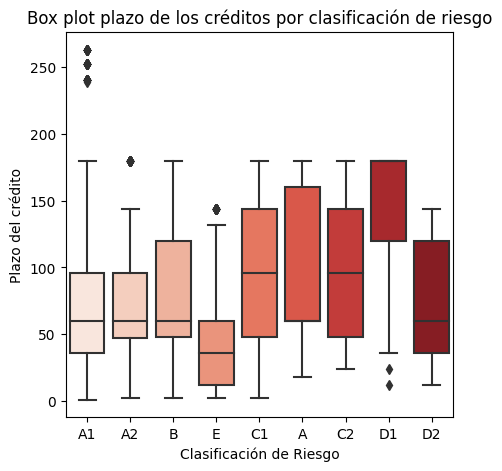

In [81]:
plt.figure(figsize=(5,5))
sns.boxplot(x='calificacion_riesgo', y='plazo', data=credito_dec.loc[credito_dec['plazo']>0], palette="Reds").set(
    xlabel='Clasificación de Riesgo', ylabel='Plazo del crédito',
    title='Box plot plazo de los créditos por clasificación de riesgo')
plt.show()

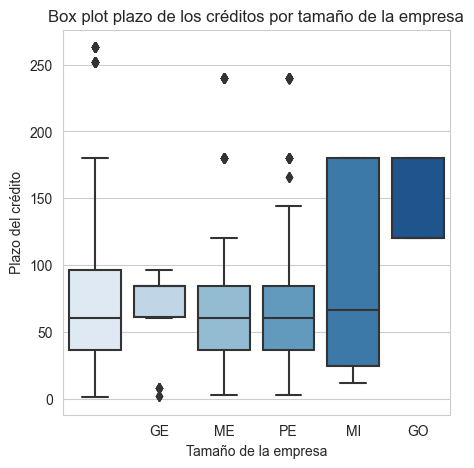

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(x='tamanio_empresa', y='plazo', data=credito_dec.loc[credito_dec['plazo']>0], palette="Blues").set(
    xlabel='Tamaño de la empresa', ylabel='Plazo del crédito', title='Box plot plazo de los créditos por tamaño de la empresa')
plt.show()

* 4.1.1 Plazos nulos o iguales a 0

In [ ]:
credito_dec['plazo'].value_counts()

60.0     1742
36.0     1390
120.0    1107
48.0      996
180.0     793
         ... 
74.0        1
158.0       1
73.0        1
86.0        1
239.0       1
Name: plazo, Length: 95, dtype: int64

In [122]:
print('valor mínimo de la variable plazo ' + str(min(credito_dec['plazo']))+ ' y el mayor valor es '+ str(max(credito_dec['plazo'])))
print('Casos de periodos negativos '+ str(len(credito_dec.loc[credito_dec['plazo']<=0])))

valor mínimo de la variable plazo -1056.0 y el mayor valor es 263.0
Casos de periodos negativos 3


<div class="alert alert-block alert-info">    
<b> Pregunta: </b>
    
* ¿Por qué la base tiene plazos negativos?


</div>

<div class="alert-success">
<b> Respuesta: </b>
    
</div>

* 4.1.2 Meses entre la fecha de otorgamiento y vencimiento.
* Revisar id "2137131-10114140435         -4755-2019-02-22 00:00:00"

In [123]:
credito_dec['cuenta_meses'] = credito_dec['fecha_vencimiento']- credito_dec['fecha_otorgamiento']

In [124]:
credito_dec['cuenta_meses'] = credito_dec['cuenta_meses']/np.timedelta64(1, 'M')

In [125]:
credito_dec['cuenta_meses'] = credito_dec['cuenta_meses'].round()
credito_dec['cuenta_meses'].value_counts()

60.0     1742
36.0     1390
120.0    1107
48.0     1025
180.0     793
         ... 
158.0       1
239.0       1
31.0        1
73.0        1
86.0        1
Name: cuenta_meses, Length: 95, dtype: int64

In [126]:
print('Número de casos con diferencia entre fecha de vencimiento y fecha de otorgamiento negativo '
      + str(credito_dec['cuenta_meses'].loc[credito_dec['cuenta_meses']<0].count().sum()))
print('Número de casos con la misma fecha de vencimiento y fecha de otorgamiento '
      + str(credito_dec['cuenta_meses'].loc[credito_dec['cuenta_meses']==0].count().sum()))

Número de casos con diferencia entre fecha de vencimiento y fecha de otorgamiento negativo 3
Número de casos con diferencia entre fecha de vencimiento y fecha de otorgamiento iguales a cero 0


In [131]:
print('valor mínimo de la variable plazo ' + str(min(credito_dec['cuenta_meses']))+ ' y el mayor valor es '+ str(max(credito_dec['cuenta_meses'])))
print('Casos de periodos negativos '+ str(len(credito_dec.loc[credito_dec['cuenta_meses']<=0])))

valor mínimo de la variable plazo -1056.0 y el mayor valor es 263.0
Casos de periodos negativos 3


In [ ]:
credito_dec.sort_values(by='cuenta_meses', ascending=True, inplace=True)
print(min(credito_dec['cuenta_meses']))

In [ ]:
credito_dec['cuenta_meses'].describe()

count    10591.000000
mean        71.371542
std         53.987808
min      -1056.000000
25%         36.000000
50%         60.000000
75%         96.000000
max        263.000000
Name: cuenta_meses, dtype: float64

* 4.1.4 Comparación plazo y cuenta_meses
* Definimos un criterio de 1 mes de diferencia por los redondeos

In [ ]:
credito_dec['dif_plazos'] = credito_dec['cuenta_meses'] - credito_dec['plazo']

In [ ]:
credito_dec['dif_plazos'].value_counts()

 0.0    10510
 1.0       64
-1.0       17
Name: dif_plazos, dtype: int64

* 4.1.5 Variación plazo en ID_UNICO_CRED_str

In [143]:
credito_dec['var_plazo'].describe()

count     10532.000000
mean        417.264639
std        6095.163310
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      106338.461538
Name: var_plazo, dtype: float64

In [139]:
credito_dec['var_plazo'] = credito_dec.groupby('ID_UNICO_CRED_str')['plazo'].transform('var')
print(credito_dec['var_plazo'].quantile([0.1, 0.5, 0.885, 0.95]))

0.100     0.000000
0.500     0.000000
0.885     0.033333
0.950    32.116959
Name: var_plazo, dtype: float64


In [171]:
IC_var = np.percentile(credito_dec['var_plazo'].loc[credito_dec['var_plazo']>=0], [2.5, 97.5])   
print('Intervalo de confianza varianza plazo (95%): ',IC_var)    
IC_var_90 = np.percentile(credito_dec['var_plazo'].loc[credito_dec['var_plazo']>=0], [5, 95])   
print('Intervalo de confianza varianza plazo (90%): ',IC_var_90)    
IC_var_80 = np.percentile(credito_dec['var_plazo'].loc[credito_dec['var_plazo']>=0], [10, 90])   
print('Intervalo de confianza varianza plazo (80%): ',IC_var_80) 
print('utilizamos como referencia el limite superior del intervalo de confianza al 80%' + str(IC_var_80[1]))

Intervalo de confianza varianza plazo (95%):  [ 0.         92.61330049]
Intervalo de confianza varianza plazo (90%):  [ 0.         32.11695906]
Intervalo de confianza varianza plazo (80%):  [0.         1.35177866]
utilizamos como referencia el limite superior del intervalo de confianza al 80%1.351778656126475


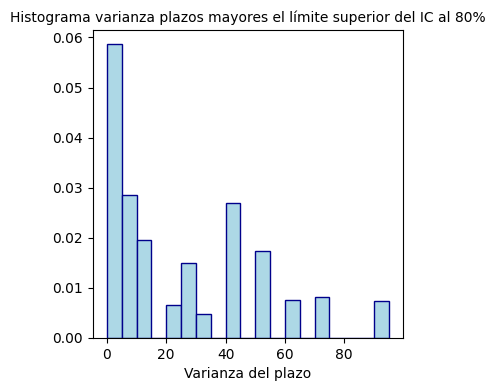

In [188]:
fig=plt.figure(figsize=(4,4))
ax=fig.add_subplot(111)

bins=np.arange(0,100,5)
n,bins,patches=ax.hist(credito_dec['var_plazo'].loc[credito_dec['var_plazo']>IC_var_80[1]],bins=bins,
                       histtype='bar',ec='darkblue',fc='lightblue',density=True)
ax.set_title('Histograma varianza plazos mayores el límite superior del IC al 80%', fontsize=10)
ax.set_xlabel('Varianza del plazo')
plt.show()

In [192]:
print(len(credito_dec['var_plazo'].loc[credito_dec['var_plazo']>IC_var_80[1]]))

1046


In [195]:
print('Observaciones con variación en plazo ' + str(credito_dec['var_plazo'].loc[credito_dec['var_plazo']>0].count()))
print('Número de identificadors únicos con variación en plazo ' + str(credito_dec['ID_UNICO_CRED_str'].loc[credito_dec['var_plazo']>0].nunique()))

Observaciones con variación en plazo 1235
Número de identificadors únicos con variación en plazo 54


In [203]:
credito_dec.loc[credito_dec['var_plazo']>0].head(100)
credito_dec['ID_UNICO_CRED_str'].loc[credito_dec['var_plazo']>0].head(100)


4151      945-000780121082        -4540-2019-10-28 00:00:00
4152      945-000780121082        -4540-2019-10-28 00:00:00
4153      945-000780121082        -4540-2019-10-28 00:00:00
4154      945-000780121082        -4540-2019-10-28 00:00:00
4155      945-000780121082        -4540-2019-10-28 00:00:00
                                ...                        
392465    39715-99-401-142733       -4715-2019-10-23 00:...
392466    39715-99-401-142733       -4715-2019-10-23 00:...
392467    39715-99-401-142733       -4715-2019-10-23 00:...
392468    39715-99-401-142733       -4715-2019-10-23 00:...
392469    39715-99-401-142733       -4715-2019-10-23 00:...
Name: ID_UNICO_CRED_str, Length: 100, dtype: object

<div class="alert alert-block alert-info">    
<b> Pregunta: </b>
    
* ¿A qué se deben las varianzas en el plazo?


</div>

<div class="alert-success">
<b> Respuesta: </b>
    
</div>

* Si el ID_UNICO_CRED_str tiene sólo una observación la varianza arroja nulo.
* Los identificamos y luego les asignamos un valor de 0. En el caso de los crédutos decrecientes de personas jurídicas no hay observaciones únicas. Para otras bases y otraos países hay que definir si los mantenemos o no en la base de datos  

In [193]:
print('Observaciones únicas ' + str(credito_dec['var_plazo'].isnull().sum()))
credito_dec['var_plazo'].fillna(0, inplace=True)

Observaciones únicas 59


In [ ]:
credito_dec['N']

13638609    26
13638610    26
5640302     21
14117601     2
14178962     2
            ..
2638002     24
2638003     24
2638020     24
2638015     24
2638012     24
Name: N, Length: 10591, dtype: int64

In [ ]:
credito_dec['ID_UNICO_CRED_str'].loc[credito_dec['cuenta_meses']<=1].count()

24

In [ ]:
credito_dec['ID_UNICO_CRED_str'].loc[credito_dec['dif_plazos']!=0].count()

81

In [ ]:
credito_dec['ID_UNICO_CRED_str'].loc[credito_dec['var_plazo']>0].count()

1235

* 4.1.6 Archivo problemas con las fechas y plazo

In [ ]:
credito_dec['probl_plazo']= np.where()

In [ ]:
credito_dec['probl_plazo']= np.where(credito_dec['cuenta_meses']<1, 1,
                                     np.where(credito_dec['cuenta_meses']==1, 1, 0))
credito_dec['probl_plazo']=  np.where(credito_dec['dif_plazos']!=0, 1, credito_dec['probl_plazo'])

credito_dec['probl_plazo']=  np.where(credito_dec['var_plazo'] >0 , 1, credito_dec['probl_plazo'])

In [ ]:
credito_dec['probl_plazo'].sum()

1328

In [ ]:
credito_dec['cuenta_meses'].describe()

count    10591.000000
mean        71.371542
std         53.987808
min      -1056.000000
25%         36.000000
50%         60.000000
75%         96.000000
max        263.000000
Name: cuenta_meses, dtype: float64

Text(0, 0.5, 'Distribución de la cantidad de días')

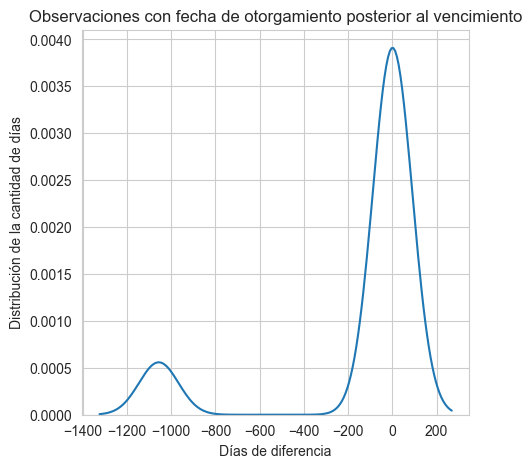

In [ ]:
plt.figure(figsize=(5,5))
sns.set_style('whitegrid')
sns.kdeplot(credito_dec.loc[credito_dec['cuenta_meses']<=1]['cuenta_meses'], bw_method=0.5, bw_adjust=0.5)
plt.title('Observaciones con fecha de otorgamiento posterior al vencimiento')
plt.xlabel('Días de diferencia')
plt.ylabel('Distribución de la cantidad de días')

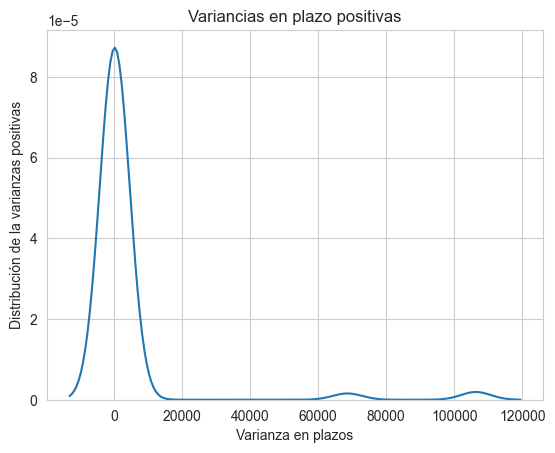

In [ ]:
sns.set_style('whitegrid')
sns.kdeplot(credito_dec.loc[credito_dec['var_plazo']>0]['var_plazo'], bw_method=0.5, bw_adjust=0.5)
plt.title('Variancias')
plt.xlabel('Varianza en plazos')
plt.ylabel('Distribución de la varianzas positivas')
plt.show()

In [ ]:
probl_plazo = credito_dec[['ID_UNICO_CRED_str','probl_plazo']].loc[credito_dec['probl_plazo']==1]

In [ ]:
probl_plazo = probl_plazo_id[['ID_UNICO_CRED_str']].copy()

In [ ]:
probl_plazo_id = pd.merge(probl_plazo, base, how='left', on='ID_UNICO_CRED_str')

In [ ]:
probl_plazo_id.head()

,ID_UNICO_CRED_str,idpersona,idpersona_str,ID_UNICO_CRED,periodo_informacion,peri_info_monthly,peri_info_y,peri_info_m,referencia_unica,id_acreedor,...,otorgante_publico_privado,regulada,tipo_entidad,ubicacion_geogrfica,obs_repetidas,periodo_informacion_100,peri_info_daily1,peri_info_dailylast,dup,var_plazo
0,5748720-10214136852 -4755-2018-12-28 0...,5748720,5748720,13355185,201901,NaT,2019.0,19988200.0,10214136852,4755,...,,Regulada,IMF,,0,2019.010010,NaT,NaT,False,NaN
1,5748720-10214136852 -4755-2018-12-28 0...,5748720,5748720,13355185,201903,NaT,2019.0,19988400.0,10214136852,4755,...,,Regulada,IMF,,0,2019.030029,NaT,NaT,False,NaN
2,5748720-10214136852 -4755-2018-12-28 0...,5748720,5748720,13355185,202106,NaT,2021.0,20008500.0,10214136852,4755,...,,Regulada,IMF,,0,2021.060059,NaT,NaT,False,NaN
3,5748720-10214136852 -4755-2018-12-28 0...,5748720,5748720,13355185,202107,NaT,2021.0,20008600.0,10214136852,4755,...,,Regulada,IMF,,0,2021.069946,NaT,NaT,False,NaN
4,5748720-10214136852 -4755-2018-12-28 0...,5748720,5748720,13355185,202108,NaT,2021.0,20008700.0,10214136852,4755,...,,Regulada,IMF,,0,2021.079956,NaT,NaT,False,NaN


In [ ]:
probl_plazo_id.to_csv(str(data)+'EFX F3 $pais 010 010 Limpieza Base - dif plazo y fechas venc-otorg.csv', index=False) 

In [ ]:
del probl_plazo_id
del probl_plazo

* 4.2 Monto del crédito

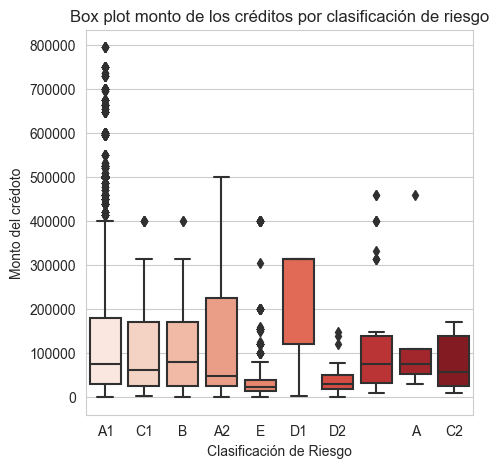

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(x='calificacion_riesgo', y='monto', data=credito_dec.loc[credito_dec['monto']<800000], palette="Reds").set(
    xlabel='Clasificación de Riesgo', ylabel='Monto del crédito',
    title='Box plot monto de los créditos por clasificación de riesgo')
plt.show()

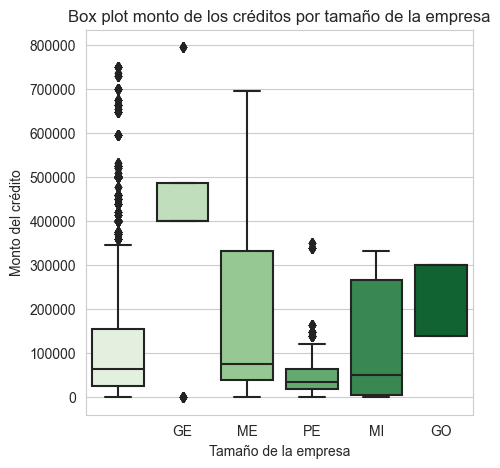

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(x='tamanio_empresa', y='monto', data=credito_dec.loc[credito_dec['monto']<800000], palette="Greens").set(
    xlabel='Tamaño de la empresa', ylabel='Monto del crédito',
    title='Box plot monto de los créditos por tamaño de la empresa')
plt.show()

* 4.2.1 Montos nulos o iguales a 0

In [ ]:
print('Número de casos con monto negativo '
      + str(credito_dec['monto'].loc[credito_dec['monto']<0].count().sum()))
print('Número de casos con monto igual a 0 '
      + str(credito_dec['monto'].loc[credito_dec['monto']==0].count().sum()))

Número de casos con monto negativo 0
Número de casos con monto igual a 0 48


* 4.2.2 Variación monto por identificador
* Revisar "1000174362-09201900017600      -6358-2020-01-17 00:00:00"

In [ ]:
credito_dec['var_monto'] = credito_dec.groupby('ID_UNICO_CRED_str')['monto'].transform('var')
print(credito_dec['var_monto'].quantile([0.5, 0.95, 0.99]))

0.50    0.000000e+00
0.95    0.000000e+00
0.99    1.914076e+08
Name: var_monto, dtype: float64


In [ ]:
print('Montos con varianza positiva ' + str(credito_dec['var_monto'].loc[credito_dec['var_monto']>0].count().sum()))

Montos con varianza positiva 518


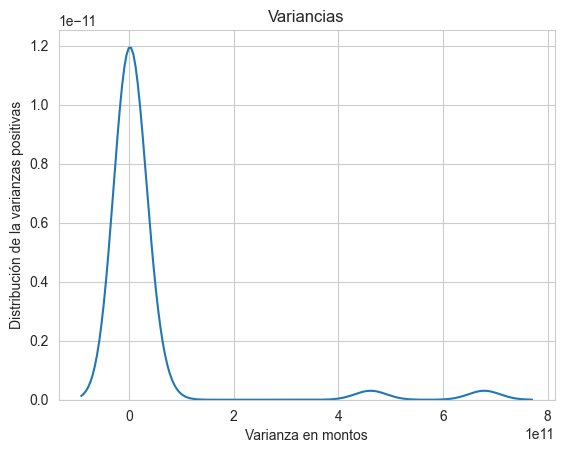

In [ ]:
sns.set_style('whitegrid')
sns.kdeplot(credito_dec.loc[credito_dec['var_monto']>0]['var_monto'], bw_method=0.5, bw_adjust=0.5)
plt.title('Variancias')
plt.xlabel('Varianza en montos')
plt.ylabel('Distribución de la varianzas positivas')
plt.show()

In [ ]:
print('Observaciones únicas ' + str(credito_dec['var_plazo'].isnull().sum()))
credito_dec['N'].loc[credito_dec['var_monto'].isnull()].value_counts()
credito_dec['var_monto'].fillna(0, inplace=True)

Observaciones únicas 59


Los 59 valores con varianza nula se debe a que tienen una sola observación por identificador.
* Definir un epsilon de tolerancia

In [ ]:
credito_dec.sort_values(by=['ID_UNICO_CRED_str', 'periodo_informacion'], inplace=True)

In [ ]:
credito_dec['dif_monto'] = credito_dec['monto'].diff()

In [ ]:
credito_dec['n'] =  credito_dec.groupby(['ID_UNICO_CRED_str']).size().sort_index()
